# K-Nearest Neighbours
The `k-Nearest Neighbors` (k-NN) algorithm is a versatile supervised learning method used for classification and regression tasks. It relies on the principle of similarity:
- predicting the class or value of a data point based on its proximity to other instances in the training set. Simple yet effective, k-NN requires no explicit training phase and is particularly suitable for small to medium-sized datasets. It's characterized by its non-parametric nature and flexibility in handling various types of data.

# Apple Quality Prediction Using K-Nearest Neighbours

Predicting the quantity of apples produced in a given region is crucial for agricultural planning and resource allocation. The **k-Nearest Neighbors** (k-NN) algorithm offers a promising approach to this task. 
 - By leveraging historical data on factors like weather conditions, soil quality, and orchard management practices, k-NN can estimate the expected yield of apples for a specific area. Its ability to make predictions based on the similarity of past instances makes it a valuable tool for optimizing apple production and ensuring a steady supply in the market.

# Import needed Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

# Data Collection

In [3]:
apple=pd.read_csv("apple_quality - KNN.csv")

In [4]:
apple.shape

(4001, 9)

In [5]:
apple.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [6]:
apple.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [7]:
apple.groupby('Juiciness')['Acidity'].mean().reset_index().head(5)

,Juiciness,Acidity
0,-5.961897,-1.778797
1,-5.814308,1.387408
2,-5.801766,2.573084
3,-5.743512,0.356696
4,-5.713431,-1.451500


In [8]:
apple['Quality'].nunique()

2

In [9]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [10]:
apple.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [11]:
apple['Size'].value_counts().reset_index()

,index,Size
0,-3.970049,1
1,-3.844134,1
2,-4.411655,1
3,-1.480046,1
4,0.749942,1
...,...,...
3995,-2.385353,1
3996,0.612499,1
3997,0.862280,1
3998,2.181630,1


In [12]:
apple.tail(5).isnull()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False
4000,True,True,True,True,True,True,True,False,True


In [13]:
apple.dropna(inplace=True)

In [14]:
apple.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [15]:
apple.shape

(4000, 9)

In [16]:
data=apple.drop('Quality',axis=1)

In [17]:
data.head(3)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473


In [18]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [19]:
import warnings
warnings.filterwarnings("ignore")

# Analysis and Visualization

In [20]:
apple['Juiciness'].nunique()

4000

<Axes: xlabel='Quality', ylabel='Sweetness'>

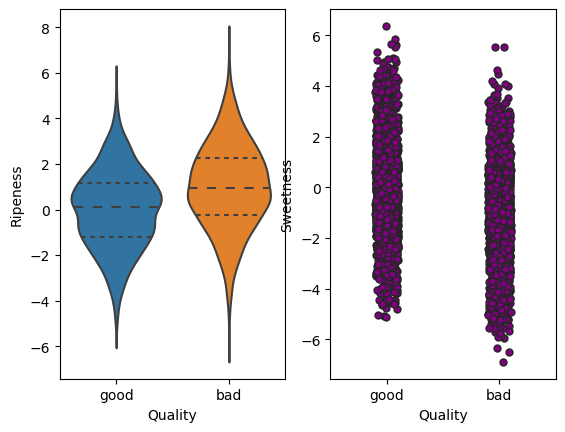

In [21]:

fig,axes  = plt.subplots(nrows=1,ncols=2)
sns.violinplot(y=apple['Ripeness'],x=apple['Quality'],inner='quartile',ax=axes[0])
sns.stripplot(y=apple['Sweetness'],x=apple['Quality'],color='purple',linewidth=1,ax=axes[1])




Text(0.5, 1.0, 'Ripeness Vs Weight')

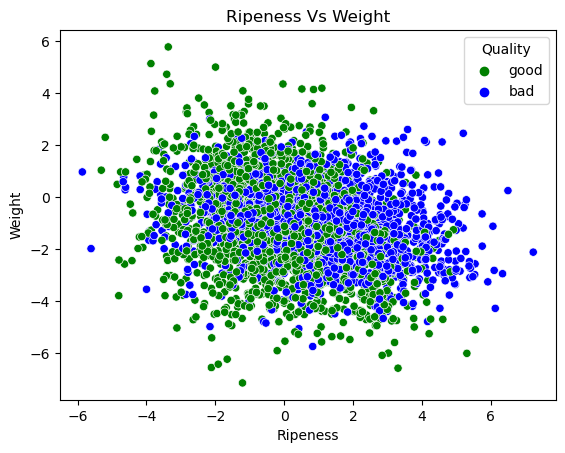

In [22]:
sns.scatterplot(x=apple['Ripeness'],y=apple['Weight'],hue=apple['Quality'],palette=['green','blue'])
plt.title("Ripeness Vs Weight")

In [23]:
sns.set(rc={'axes.facecolor':'black','axes.grid':'True'})

In [24]:
new=apple.sample(25)

<Axes: xlabel='Juiciness', ylabel='Acidity'>

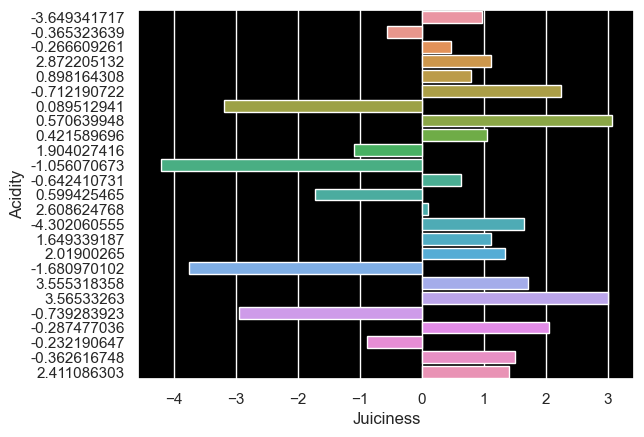

In [25]:
sns.barplot(x=new['Juiciness'],y=new['Acidity'],fill=True)

In [26]:
sns.set(rc={'axes.facecolor':'c','axes.grid':'True'})

<Axes: xlabel='Sweetness', ylabel='Count'>

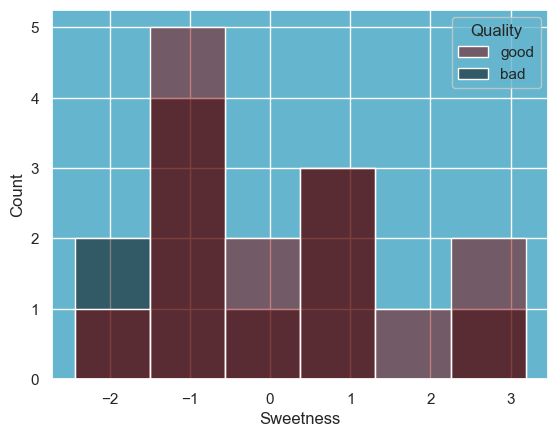

In [27]:
sns.histplot(x=apple['Sweetness'],kde=False,hue=new['Quality'],palette=['maroon','black'])


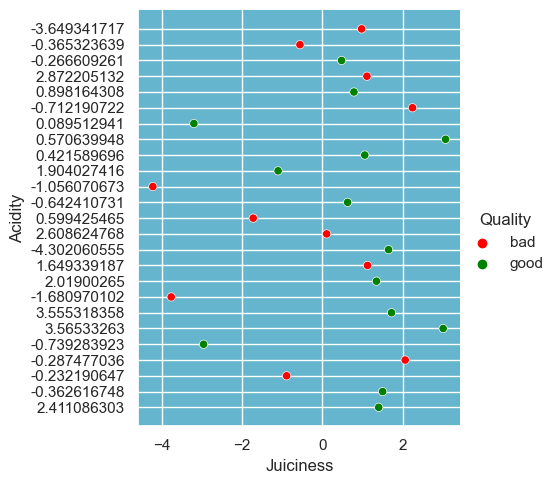

In [39]:
sns.relplot(x=new['Juiciness'],y=new['Acidity'],hue=new['Quality'],palette=['red','green'])


<Figure size 1000x500 with 0 Axes>

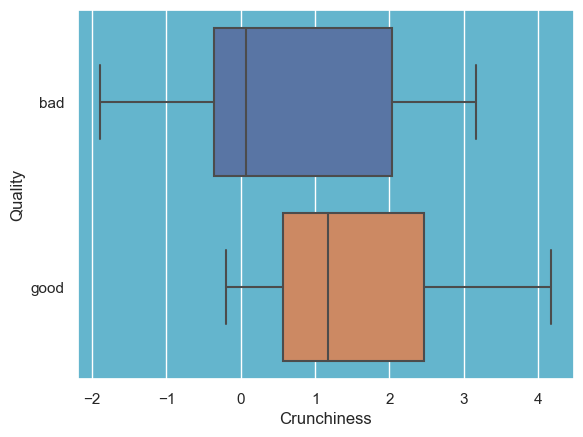

<Figure size 1000x500 with 0 Axes>

In [40]:
sns.boxplot(x=new['Crunchiness'].head(25),y=new['Quality'].head(25))
plt.figure(figsize=(10,5))

In [41]:
def outlier(columns,df):
    
    q1=apple[columns].quantile(0.25)
    q3=apple[columns].quantile(0.75)
    iqr=q3-q1
    print(q1,q3,iqr)
    upper_limit=q3+(1.5*iqr)
    lower_limit=q3-(1.5*iqr)
    lower_limit,upper_limit
    apple.loc[(apple[columns]>upper_limit) | (apple[columns]<lower_limit)]
    new_data=apple.copy()
    new_data.loc[(new_data[columns]>upper_limit),columns]=upper_limit
    new_data.loc[(new_data[columns]<lower_limit),columns]=lower_limit
    print(f'''{sns.boxplot(x=new_data[columns].head(25),y=new_data[df].head(25))
,plt.figure(figsize=(10,5))}''')
    print

# Without Outlier

0.06276439525000001 1.8942342170000002 1.83146982175
(<Axes: xlabel='Crunchiness', ylabel='Quality'>, <Figure size 1000x500 with 0 Axes>)


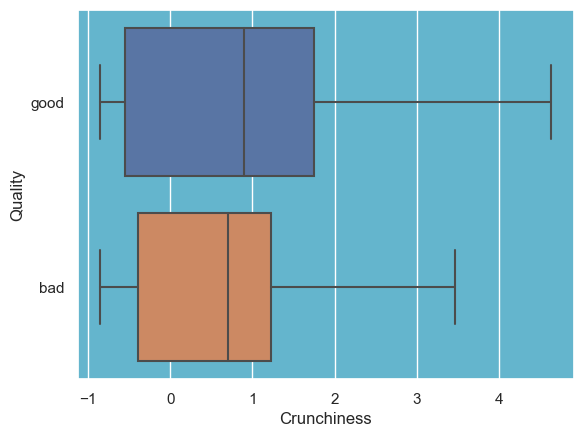

<Figure size 1000x500 with 0 Axes>

In [42]:
outlier('Crunchiness','Quality')

In [43]:
data=apple.drop('Quality',axis=1)

<Axes: >

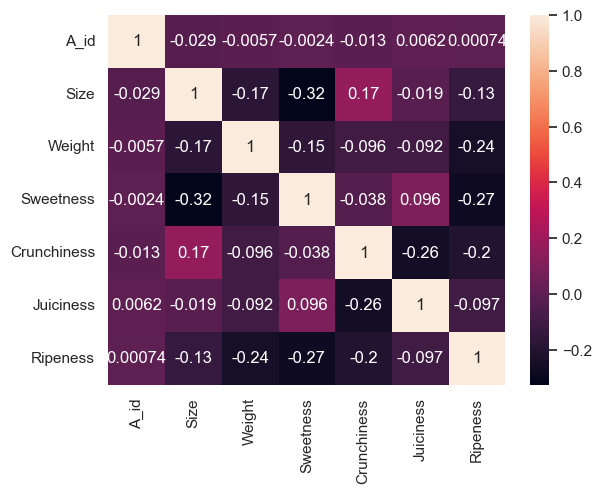

In [44]:

sns.heatmap(data.corr(),annot=True)



# Data Pre-processing

In [45]:
apple.drop('A_id',axis=1,inplace=True)

In [46]:
apple.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [47]:
apple.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [48]:
apple[['Acidity']]

,Acidity
0,-0.491590483
1,-0.722809367
2,2.621636473
3,0.790723217
4,0.501984036
...,...
3995,0.137784369
3996,1.854235285
3997,-1.334611391
3998,-2.229719806


In [49]:
apple['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [50]:
apple['Quality']=apple['Quality'].map({'good':1,'bad':0})

In [51]:
apple.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0


In [52]:
apple['Acidity']=pd.to_numeric(apple['Acidity'],errors='coerce')

In [53]:
apple.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

In [54]:
apple.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

# Training  the Data set

In [55]:
features=apple.drop('Quality',axis=1)

In [56]:
target=apple['Quality']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [59]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(3200, 7)
(3200,)
(800, 7)


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score,mean_absolute_error,mean_squared_error
    

In [65]:
def alg(ml_model):
    model=ml_model.fit(X_train,y_train)
    print(f''' Training score{model.score(X_train,y_train)}''')
    y_pred=model.predict(X_test)
    
    ACC=accuracy_score(y_test,y_pred)
    print("Accuracy:",ACC)
    cnc=confusion_matrix(y_test,y_pred)
    print("confusion matrics",cnc)
    sns.heatmap(cnc,annot=True,fmt='.3f')
    r2=r2_score(y_test,y_pred)
    print('r2-score:',r2)
    print('MAE:',mean_absolute_error(y_test,y_pred))
    print('MsE:',mean_squared_error(y_test,y_pred))
    

 Training score0.943125
Accuracy: 0.89875
confusion matrics [[382  47]
 [ 34 337]]
r2-score: 0.5928599702184607
MAE: 0.10125
MsE: 0.10125


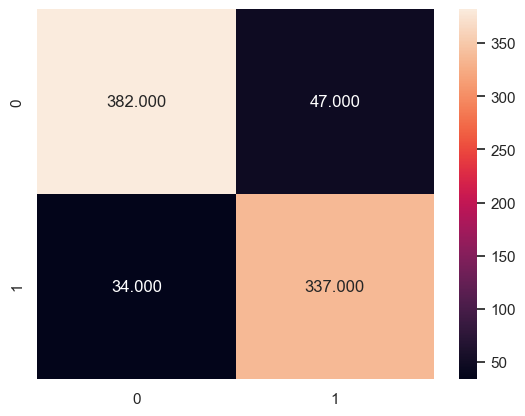

In [66]:
alg(KNeighborsClassifier(n_neighbors=3,p=1))

In [67]:
from sklearn.ensemble import GradientBoostingClassifier


 Training score0.9053125
Accuracy: 0.87625
confusion matrics [[370  59]
 [ 40 331]]
r2-score: 0.5023844080447852
MAE: 0.12375
MsE: 0.12375


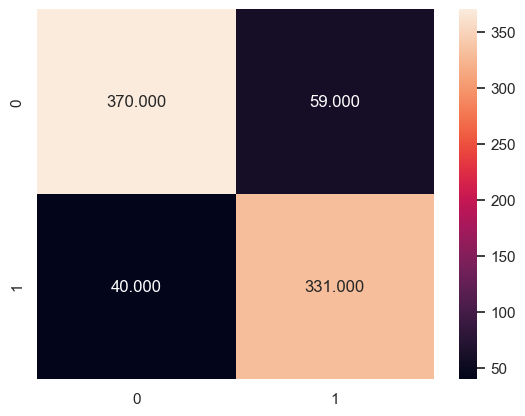

In [68]:
alg(GradientBoostingClassifier())

# conclusion

the **k-nearest neighbors** algorithm for Apple quality prediction demonstrates promising results. By leveraging the 
proximity-based approach of KNN, we can accurately classify apples into quality categories based on various features such as
color, size, texture, and weight. However, the effectiveness of the model heavily relies on selecting an optimal value for k 
and ensuring the quality and relevance of the input data. With further refinement and fine-tuning, KNN presents a valuable tool
for enhancing quality control processes in the apple industry, aiding in better sorting, grading, and distribution practices.
K-NN is more than effectively work on gradient boosting for this dataset.